In [16]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten, BatchNormalization, MaxPooling2D, Dropout, RandomFlip, RandomZoom,RandomRotation,RandomContrast
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
dog_images=[]
dog=[1,0]

dir = '/home/sourav/Downloads/img/train/dogs'

for files in os.listdir(dir):
    dog_images.append(files)

def func_image_reading_reshape(image_list, animal):
    empty_list1=[]
    empty_list2=[]
    for image in image_list:
        image=os.path.join(dir,image)
        image=cv2.imread(image)
        image=cv2.resize(image,(100,100))
        empty_list1.append(image)
        out=animal
        empty_list2.append(out)
    return empty_list1, empty_list2


inp1_tensor, out1_tensor= func_image_reading_reshape(dog_images,dog)

cats_images=[]
cat=[0,1]

dir = '/home/sourav/Downloads/img/train/cats'

for files in os.listdir(dir):
    cats_images.append(files)   

inp2_tensor, out2_tensor= func_image_reading_reshape(cats_images,cat)

inp_tensor=inp1_tensor + inp2_tensor
out_tensor=out1_tensor + out2_tensor

In [3]:
inp_tensor=np.array(inp_tensor)
out_tensor=np.array(out_tensor)

print(inp_tensor.shape)
print(out_tensor.shape)

(557, 100, 100, 3)
(557, 2)


### Normalization of inp_tensor

In [4]:
mean=[]
min=[]
max=[]
for i in range(3):
    mean.append(np.mean(inp_tensor[:,:,:,i]))
    min.append(np.min(inp_tensor[:,:,:,i]))
    max.append(np.max(inp_tensor[:,:,:,i]))

norm_inp=np.zeros((557,100,100,3))

for i in range(557):
    for j in range(100):
        for m in range(100):
            for n in range(3):
               norm_inp[i,j,m,n] =(inp_tensor[i,j,m,n]-mean[n])/max[n] -min[n]

### Random shuffle of list index

In [5]:
import random

my_list=[]
random.seed(0)

for m in range(len(inp_tensor)):
    my_list.append(m)

shuffled_list = random.sample(my_list, len(my_list))

In [6]:
inp_shuffel=[]
oup_shuffel=[]
for idx in shuffled_list:
    inp_shuffel.append(norm_inp[idx])
    oup_shuffel.append(out_tensor[idx])

inp_shuffel=np.array(inp_shuffel)
oup_shuffel=np.array(oup_shuffel)


print(inp_shuffel.shape)
oup_shuffel.shape

(557, 100, 100, 3)


(557, 2)

In [7]:
#print(inp_shuffel[56][60])
#oup_shuffel[56]

### Validation Set

In [7]:
dog_images=[]
dog=[1,0]

dir = '/home/sourav/Downloads/img/test/dogs'

for files in os.listdir(dir):
    dog_images.append(files)   

X_test, Y_test= func_image_reading_reshape(dog_images,dog)

cat_images=[]
cat=[0,1]

dir = '/home/sourav/Downloads/img/test/cats'

for files in os.listdir(dir):
    cat_images.append(files) 

X1_test, Y1_test= func_image_reading_reshape(cat_images,cat)

X_val=X_test+ X1_test
Y_val=Y_test+ Y1_test

X_val=np.array(X_val)
Y_val=np.array(Y_val)


#################################################################
#  Normalization

mean=[]
min=[]
max=[]
for i in range(3):
    mean.append(np.mean(X_val[:,:,:,i]))
    max.append(np.max(X_val[:,:,:,i]))
    min.append(np.min(X_val[:,:,:,i]))
mean

norm_Xval=np.zeros((140,100,100,3))

for i in range(140):
    for j in range(100):
        for m in range(100):
            for n in range(3):
               norm_Xval[i,j,m,n] =(X_val[i,j,m,n]-mean[n])/max[n] -min[n]

################################################################

print(norm_Xval.shape)
print(Y_val.shape)

(140, 100, 100, 3)
(140, 2)


### Random Shuffel of the Validation Set

In [8]:
import random

my_list=[]
random.seed(0)

for m in range(len(X_val)):
    my_list.append(m)

shuffled_list = random.sample(my_list, len(my_list))

Xval_shuffel=[]
Yval_shuffel=[]
for idx in shuffled_list:
    Xval_shuffel.append(norm_Xval[idx])
    Yval_shuffel.append(Y_val[idx])

Xval_shuffel=np.array(Xval_shuffel)
Yval_shuffel=np.array(Yval_shuffel)


print(Xval_shuffel.shape)
Yval_shuffel.shape

(140, 100, 100, 3)


(140, 2)

### Model Development

In [13]:
dataAug_model= Sequential()
dataAug_model.add(RandomFlip('horizontal', input_shape=(100, 100, 3)))
dataAug_model.add(RandomRotation(0.2))
dataAug_model.add(RandomZoom(0.3))
dataAug_model.add(RandomContrast(0.8))

In [20]:
model=Sequential()

model.add(dataAug_model)

model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'] )
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 256)       7168      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 256)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 49, 49, 256)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                 

In [21]:
#Useful to stop overfitting

#callbacks=[EarlyStopping(monitor='val_accuracy', patience=10)]

save_model=ModelCheckpoint('CNN-best-model.hd5',monitor='val_accuracy', save_best_only=True)

Epoch 1/10


2023-11-18 14:40:39.905792: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 983449600 exceeds 10% of free system memory.
2023-11-18 14:40:42.249363: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 983449600 exceeds 10% of free system memory.


1/6 [====>.........................] - ETA: 22s - loss: 0.6922 - accuracy: 0.5500

2023-11-18 14:40:43.448657: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 983449600 exceeds 10% of free system memory.
2023-11-18 14:40:45.806079: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 983449600 exceeds 10% of free system memory.


2/6 [=========>....................] - ETA: 14s - loss: 0.6934 - accuracy: 0.5100

2023-11-18 14:40:47.033946: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 983449600 exceeds 10% of free system memory.


6/6 [==============================] - ETA: 0s - loss: 0.7008 - accuracy: 0.4865INFO:tensorflow:Assets written to: CNN-best-model.hd5/assets


INFO:tensorflow:Assets written to: CNN-best-model.hd5/assets


6/6 [==============================] - 23s 4s/step - loss: 0.7008 - accuracy: 0.4865 - val_loss: 0.6928 - val_accuracy: 0.4929
Epoch 2/10
6/6 [==============================] - 21s 3s/step - loss: 0.6966 - accuracy: 0.4560 - val_loss: 0.6942 - val_accuracy: 0.4857
Epoch 3/10
6/6 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5260INFO:tensorflow:Assets written to: CNN-best-model.hd5/assets


INFO:tensorflow:Assets written to: CNN-best-model.hd5/assets


6/6 [==============================] - 22s 4s/step - loss: 0.6932 - accuracy: 0.5260 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 21s 3s/step - loss: 0.6898 - accuracy: 0.5494 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 21s 3s/step - loss: 0.6878 - accuracy: 0.5458 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5566INFO:tensorflow:Assets written to: CNN-best-model.hd5/assets


INFO:tensorflow:Assets written to: CNN-best-model.hd5/assets


6/6 [==============================] - 22s 4s/step - loss: 0.6857 - accuracy: 0.5566 - val_loss: 0.6954 - val_accuracy: 0.5643
Epoch 7/10
6/6 [==============================] - 21s 3s/step - loss: 0.6878 - accuracy: 0.5530 - val_loss: 0.6928 - val_accuracy: 0.5357
Epoch 8/10
6/6 [==============================] - 21s 3s/step - loss: 0.6854 - accuracy: 0.5548 - val_loss: 0.6977 - val_accuracy: 0.5429
Epoch 9/10
6/6 [==============================] - 21s 4s/step - loss: 0.6830 - accuracy: 0.5781 - val_loss: 0.7096 - val_accuracy: 0.5214
Epoch 10/10
6/6 [==============================] - 21s 3s/step - loss: 0.6782 - accuracy: 0.6050 - val_loss: 0.7090 - val_accuracy: 0.5357


Text(0, 0.5, 'Accuracy')

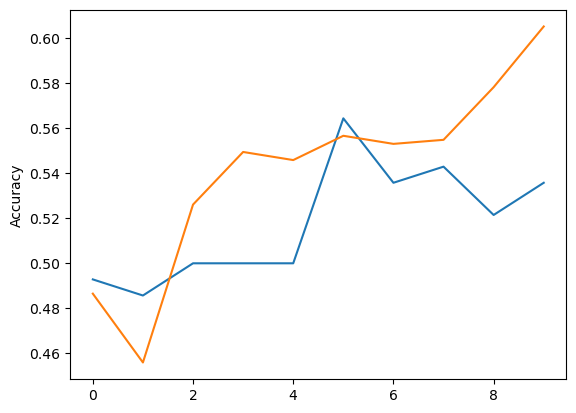

In [22]:
h=model.fit(inp_shuffel,oup_shuffel, batch_size=100, validation_data=(Xval_shuffel,Yval_shuffel), epochs=10, callbacks=save_model)
val_accuracy=h.history['val_accuracy']
training_accuracy=h.history['accuracy']

plt.plot(val_accuracy, label='Test')
plt.plot(training_accuracy, label='Training')
plt.ylabel('Accuracy')

In [13]:
#Useful to stop overfitting

#callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)]

### Prediction using the model

(100, 100, 3)

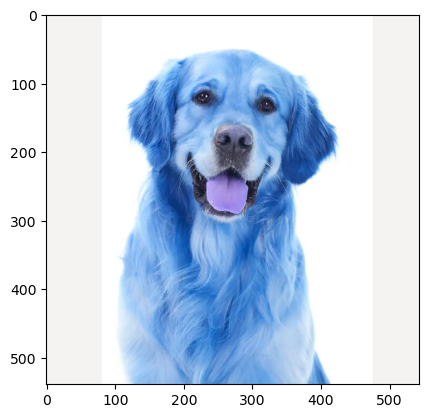

In [23]:
image='/home/sourav/Pictures/Screenshots/image4.png'


image=cv2.imread(image)
plt.imshow(image)
image=cv2.resize(image,(100,100))


#########################Normalization
mean=[]
max=[]
min=[]
for i in range(3):
    mean.append(np.mean(image[:,:,i]))
    max.append(np.max(image[:,:,i]))
    min.append(np.min(image[:,:,i]))

image.shape

In [25]:

norm_Xpred=np.zeros((100,100,3))

for j in range(100):
    for m in range(100):
        for n in range(3):
            norm_Xpred[j,m,n] =(image[j,m,n]-mean[n])/max[n] -min[n]

################################################################

norm_Xpred=norm_Xpred.reshape(1,100,100,3)


predeiction=model.predict(norm_Xpred)

print(predeiction)

predeiction=np.argmax(predeiction)

print()
print() 
if predeiction == 0:
    print("Prediction:  Dog")
if predeiction == 1:
    print("Prediction:  Cat")

1/1 [==============================] - 0s 18ms/step
[[7.5970386e-04 9.9924028e-01]]


Prediction:  Cat
